## CARDIO GOOD FITNESS

The market research team at Adright is assigned the task to identify the profile of the typical customer for each treadmill product offered by CarfioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to coolect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months.

ABOUT DATASET:
*   product purchased, TM195, TM498, or TM798;
*   gender;
*   age, in years;
*   education, in years;
*   relationship status, single or partnered;
*   annual household income ;
*   average number of times the customer plans to use the treadmill each week;`
*   average number of miles the customer expects to walk/run each week;
*   self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv("/content/sample_data/CardioGoodFitness.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [4]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [9]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [47]:
df.shape

(180, 9)

In [5]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


# EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7fc11c340>,
      dtype=object)

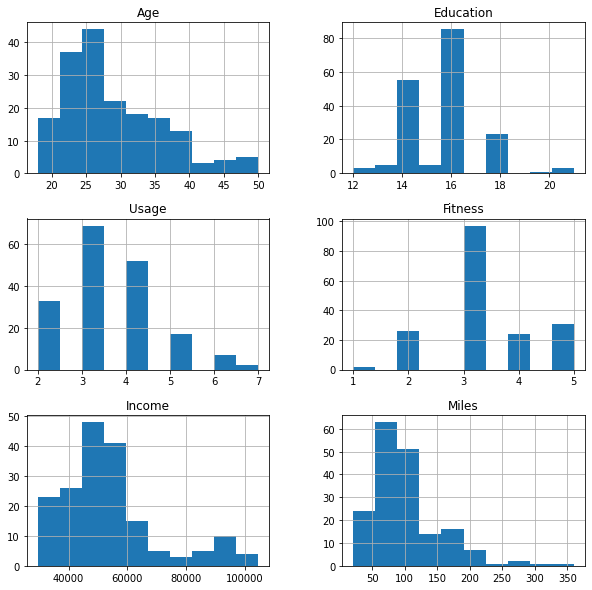

In [10]:
df.hist(figsize = (10,10))

From above histogram we can observe certain factors:

Common Age is between 22 to 28 yrs

Income is between 30000 to 58000 yrs

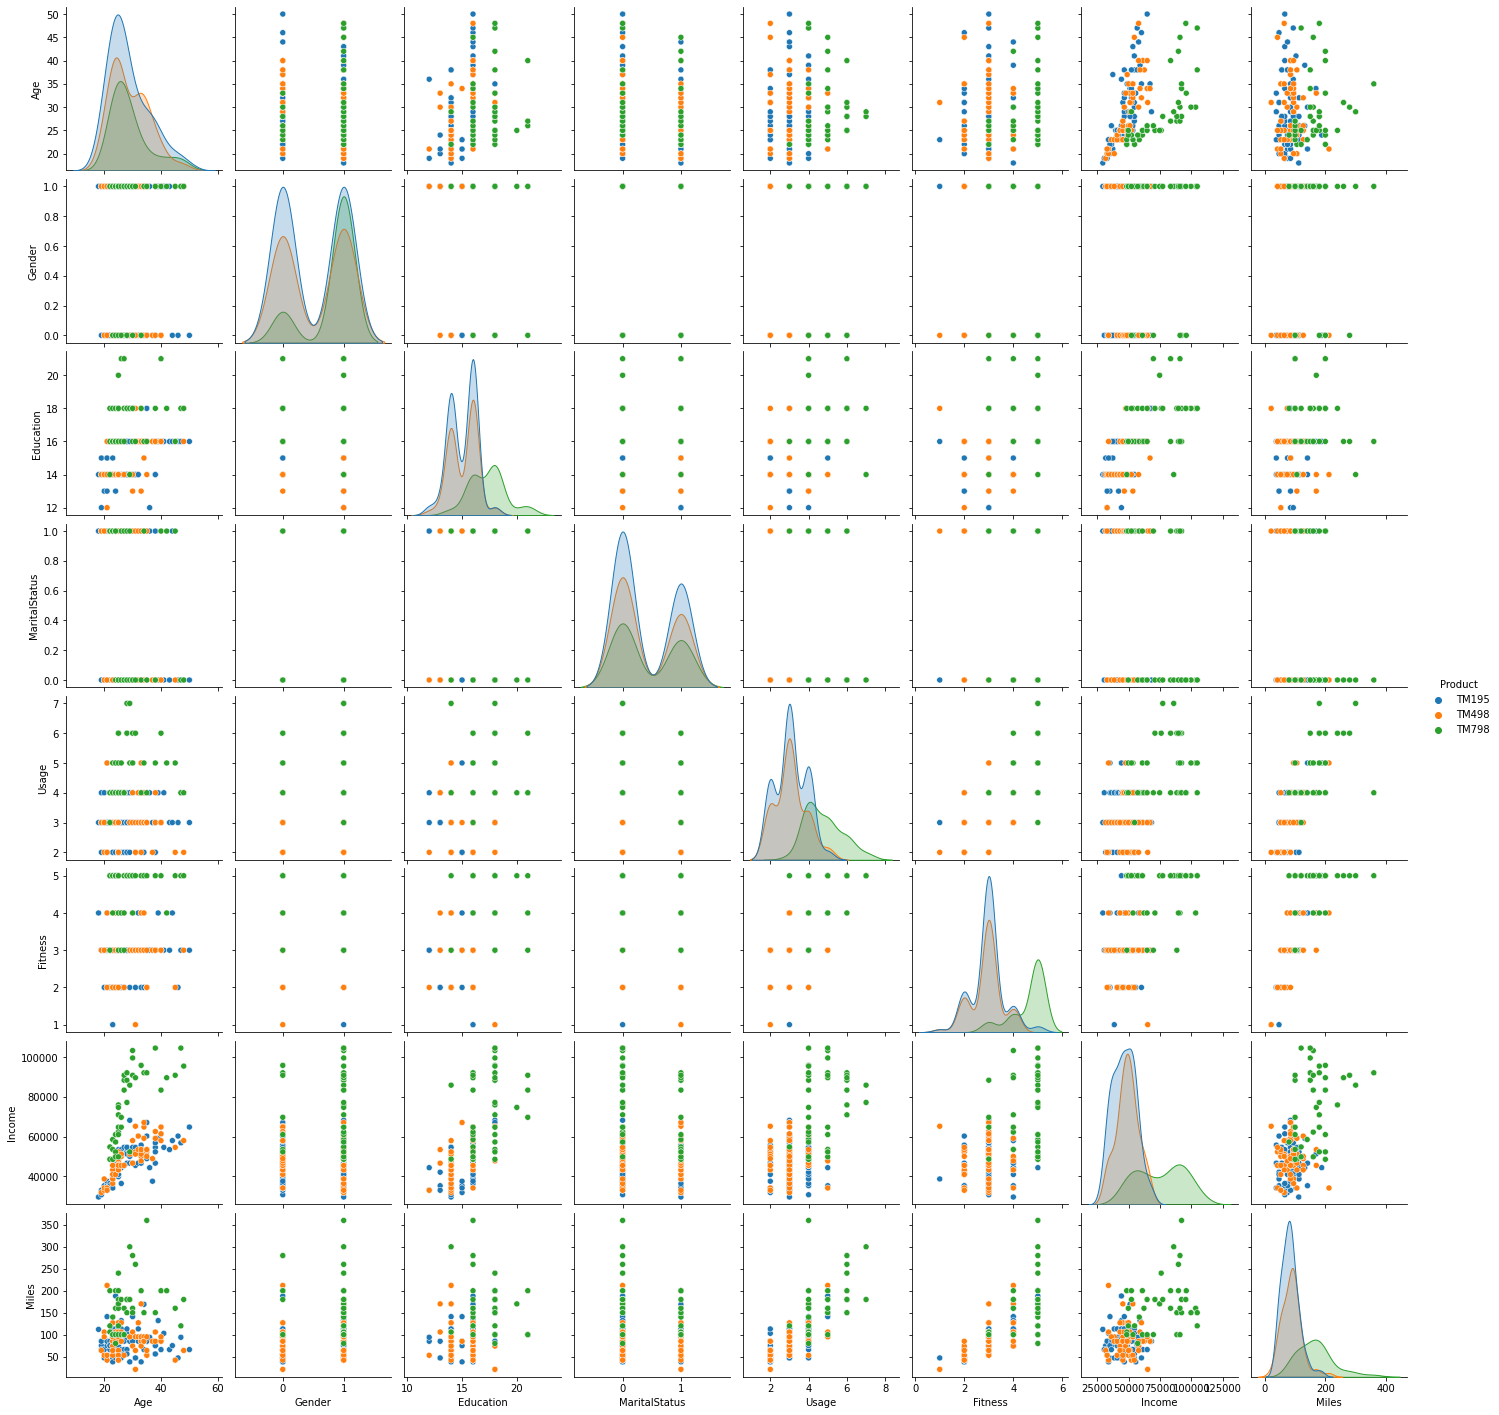

In [45]:
sn.pairplot(data=df,hue ='Product')

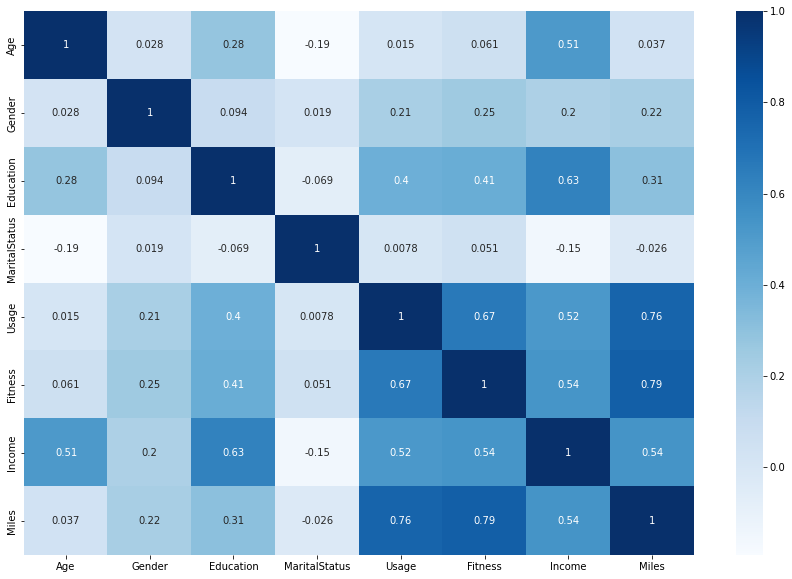

In [30]:
corr = df.corr()
features = corr.index
plt.figure(figsize=(15,10))
ax = sn.heatmap(df[features].corr(), annot=True, cmap='Blues')

From this heatmap we can find that

Miles and Fitness are highly correlated.

Miles and Usage are also correlated.

## Converting Datatype Object to Int

In [19]:
df['Gender']= df['Gender'].replace('Male',1)
df['Gender']= df['Gender'].replace('Female',0)

In [21]:
df['MaritalStatus']= df['MaritalStatus'].replace('Single',1)
df['MaritalStatus']= df['MaritalStatus'].replace('Partnered',0)

In [56]:
df['Product']= df['Product'].replace('TM798',1)
df['Product']= df['Product'].replace('TM498',1)
df['Product']= df['Product'].replace('TM195',0)

In [22]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,1,14,1,3,4,29562,112
1,TM195,19,1,15,1,2,3,31836,75
2,TM195,19,0,14,0,4,3,30699,66
3,TM195,19,1,12,1,3,3,32973,85
4,TM195,20,1,13,0,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,1,21,1,6,5,83416,200
176,TM798,42,1,18,1,5,4,89641,200
177,TM798,45,1,16,1,5,5,90886,160
178,TM798,47,1,18,0,4,5,104581,120


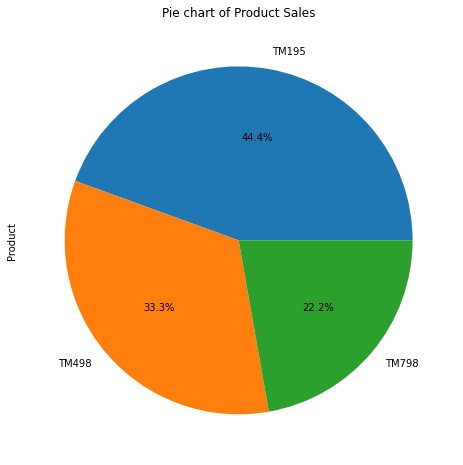

In [31]:
plt.figure(figsize=(12,7))
df['Product'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(8,8))
plt.title("Pie chart of Product Sales")
plt.show()

TM195 IS HAVING MORE SALES THAN OTHERE THREE PRODUCTS

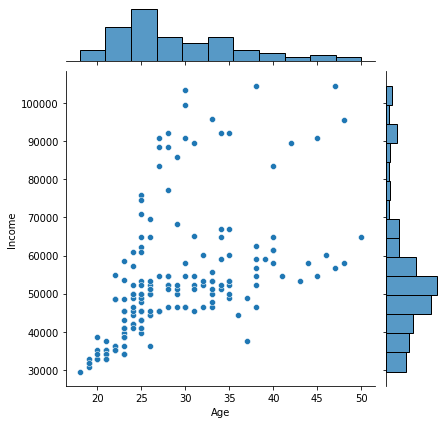

In [28]:
sn.jointplot(x='Age',y='Income',data=df)
plt.show()

AGE BETWEEN 23 TO 30 HAVE SALARY OF 35000 TO 58000 RS

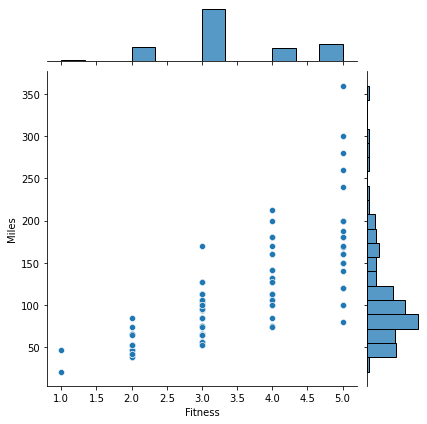

In [44]:
sn.jointplot(y='Miles',x='Fitness',data=df)
plt.show()

Majority of people run between 30 to 130 miles

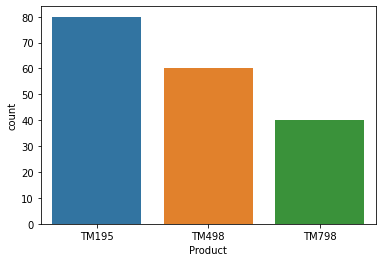

In [33]:
sn.countplot(data=df,x = 'Product')

MOSTLY USED PRODUCT IS TM195 AMONG ALL

## USING LOGISTIC REGRESSION

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

In [57]:
x=df.drop('Fitness',axis=1)   #in this y variable is droped so that we can get everything in X
x

,Product,Age,Gender,Education,MaritalStatus,Usage,Income,Miles
0,0,18,1,14,1,3,29562,112
1,0,19,1,15,1,2,31836,75
2,0,19,0,14,0,4,30699,66
3,0,19,1,12,1,3,32973,85
4,0,20,1,13,0,4,35247,47
...,...,...,...,...,...,...,...,...
175,1,40,1,21,1,6,83416,200
176,1,42,1,18,1,5,89641,200
177,1,45,1,16,1,5,90886,160
178,1,47,1,18,0,4,104581,120


In [58]:
y = df['Fitness']
y

0      4
1      3
2      3
3      3
4      2
      ..
175    5
176    4
177    5
178    5
179    5
Name: Fitness, Length: 180, dtype: int64

**Train and fit a logistic regression model on the training set.**

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3)

In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 60 to 112
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Product        126 non-null    int64
 1   Age            126 non-null    int64
 2   Gender         126 non-null    int64
 3   Education      126 non-null    int64
 4   MaritalStatus  126 non-null    int64
 5   Usage          126 non-null    int64
 6   Income         126 non-null    int64
 7   Miles          126 non-null    int64
dtypes: int64(8)
memory usage: 8.9 KB


In [61]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 3 to 26
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Product        54 non-null     int64
 1   Age            54 non-null     int64
 2   Gender         54 non-null     int64
 3   Education      54 non-null     int64
 4   MaritalStatus  54 non-null     int64
 5   Usage          54 non-null     int64
 6   Income         54 non-null     int64
 7   Miles          54 non-null     int64
dtypes: int64(8)
memory usage: 3.8 KB


## Predictions and Evaluations
**Now predict values for the testing data.**

In [62]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
predictions = logmodel.predict(X_test)

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.50      0.50      0.50         8
           3       0.76      0.91      0.83        32
           4       0.00      0.00      0.00         5
           5       0.75      0.75      0.75         8

    accuracy                           0.72        54
   macro avg       0.40      0.43      0.42        54
weighted avg       0.64      0.72      0.68        54



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### CHECKING ACCURACY

In [65]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,predictions)
accuracy

0.7222222222222222

BY LOGISTIC IT IS 72% ACCURATE

# USING SVM

In [66]:
from sklearn.svm import SVC

In [67]:
algo = SVC()

In [68]:
algo.fit(X_train,y_train)

SVC()

In [69]:
predicts = algo.predict(X_test)

In [70]:
from sklearn.metrics import classification_report,confusion_matrix

In [71]:
print(confusion_matrix(y_test,predicts))

[[ 0  0  1  0  0]
 [ 0  0  8  0  0]
 [ 0  0 32  0  0]
 [ 0  0  5  0  0]
 [ 0  0  4  0  4]]


In [72]:
print(classification_report(y_test,predicts))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         8
           3       0.64      1.00      0.78        32
           4       0.00      0.00      0.00         5
           5       1.00      0.50      0.67         8

    accuracy                           0.67        54
   macro avg       0.33      0.30      0.29        54
weighted avg       0.53      0.67      0.56        54



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,predicts)
accuracy

0.6666666666666666

BY SVM IT IS 67% ACCURATE

### CONCLUSION


TM195 most economic and beginner choice; 

TM798 Expert level fitness choice.

TM195 and TM498 customer character does not varry much.

TM195
Most popular
prefered amoung people with lower income range, fitness level less then equal to 3, usage less then 4 times in a week.

TM498
Less popular then TM195.
low income group, moderate fitness level.

TM798
Least sold.
High end model.
prefered amoung the people with higher income range, fitness level above 4 and usage more then 4 times in a week.

Technical summary

Many data are right skewed
may encounter class imbalence problem.